# Project: Predicting Heart Disease Using Machine Learning

This project focuses on using Machine Learning to predict whether a person has heart disease or not based on their medical attributes.

## 1. Problem Defination:
Given clinical parameter of patients classifying whether they have heart disease or not ?

## 2. Data:

### Heart Disease UCI Dataset

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Data Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation:

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features:


### Data Dictionary: 

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Preparing the tools:

In [2]:
# Importing the data

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data:

In [8]:
df = pd.read_csv("C:/Machine Learning Tools/Resources/Project#1 Heart_Disease/6.1 heart-disease.csv")
df.shape

(303, 14)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
# Let's find out how many of each class are there.
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

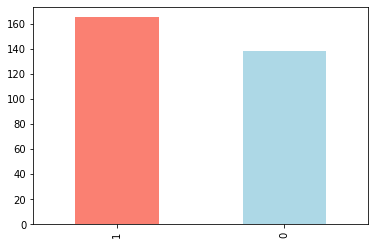

In [15]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# Checking if missing values are there.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
# Description of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex


In [31]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [23]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


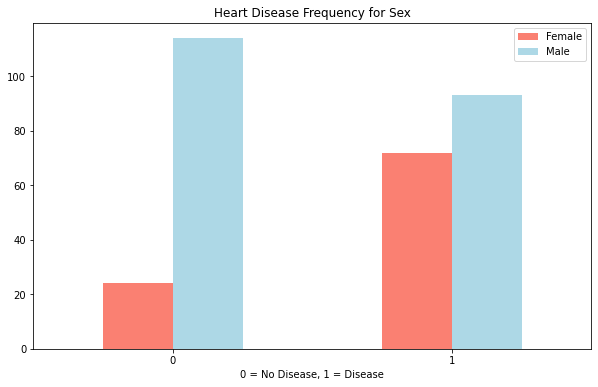

In [30]:
 # Compare target column with sex column
pd.crosstab(df["target"], df["sex"]).plot(kind = "bar",
                                         figsize = (10, 6),
                                         color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);


### Age vs Max Heart Rate for heart Disease

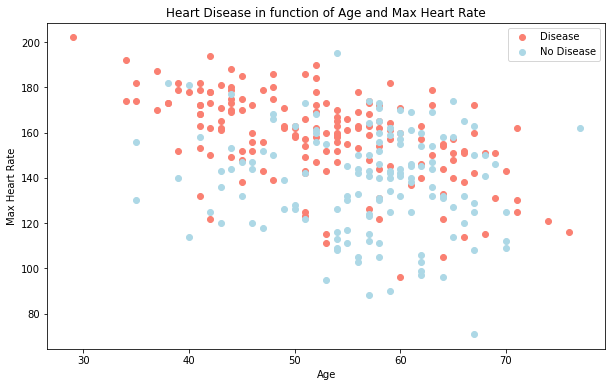

In [32]:
  # Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

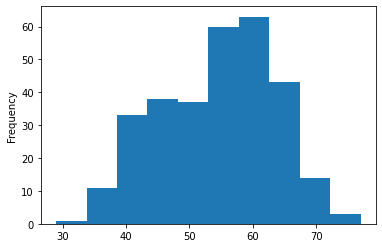

In [33]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

Remember from our data dictionary what the different levels of chest pain are.

cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [34]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


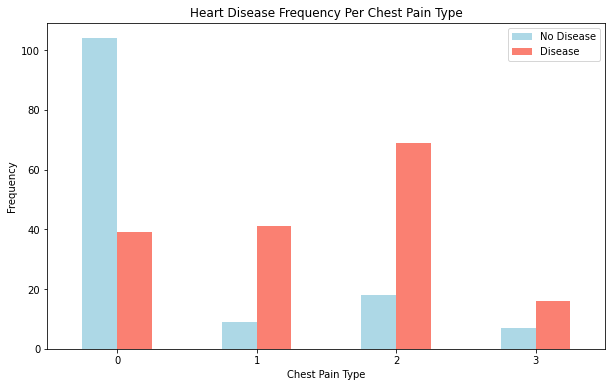

In [38]:
# Visualizing
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

### Correlation between independent variables

In [39]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


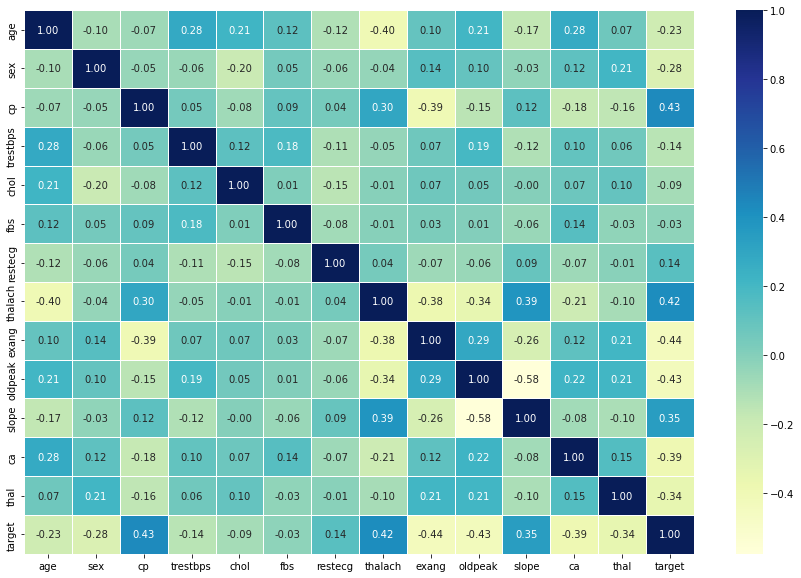

In [40]:
# Visualizing
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## 5. Modelling

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Splitting data into X and Y
X = df.drop("target", axis =1)
y = df["target"]

In [43]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [48]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### Experimenting with ML Algorithms( Using sklearn map )
* Logistic Regression (As Research sugests)
* KNN ( As sklearn map suggests)
* RandomForestClassifier ( As sklearn map suggests)

In [11]:
# Creating a Dictionary of our models
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()
          }

# Looping through each model providing each of them the training and testing and finally outputing their respective scores.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] =model.score(X_test, y_test)
    return model_scores

In [58]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test, 
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\Hawk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

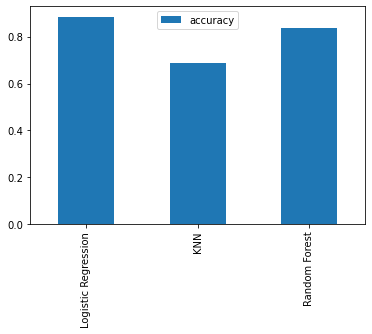

In [59]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

## 6.  Hyperparameter tuning and Evaluation

#### (Hyperparameter tuning with RandomizedSearchCV)

In [18]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4,20),
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

In [15]:
# Tuning LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv =5,
                               n_iter = 20,
                               verbose = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [16]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [17]:
# Evaluating LogisticRegression
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [20]:
# Tuning RandomForestClassifier
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [21]:
# Evaluating RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8688524590163934

Even after hyperparameter tuning RandomForestClassifier scores less than Logistic Regression.

#### ( Hyperparameter tuning using GridSearchCV)

In [22]:
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver" : ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [23]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [25]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating the model, beyond accuracy

* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

In [27]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\Hawk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


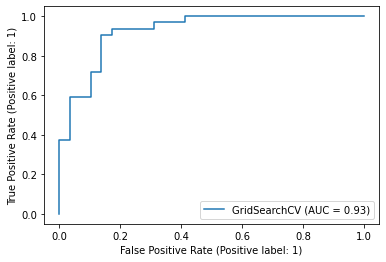

In [28]:
# ROC Curve
plot_roc_curve(gs_log_reg, X_test, y_test)

In [29]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


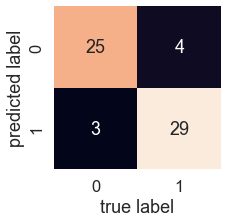

In [30]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Calculate evaluation metrices using cross-validation

* Precision
* Recall
* f1-score

In [32]:
# Checking best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [33]:
# Creating a new Classifier
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

In [38]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [39]:
np.mean(cv_acc)

0.8446994535519124

In [40]:
# Cross-validated precision
cv_precision = cross_val_score(clf,X,y,cv = 5, scoring = "precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [41]:
np.mean(cv_precision)

0.8207936507936507

In [45]:
# Cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv = 5, scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [46]:
np.mean(cv_recall)

0.9212121212121213

In [47]:
## Cross-validated f1 score
cv_f1 = cross_val_score(clf,X,y,cv = 5, scoring = "f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [48]:
np.mean(cv_f1)

0.8673007976269721

### 6. Feature Importance

In [54]:
# Fititng an instance of LogisticRegression
clf = LogisticRegression(C =0.20433597178569418, solver = "liblinear")
clf.fit(X_train, y_train);

In [57]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [61]:
# Matching Features to column
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

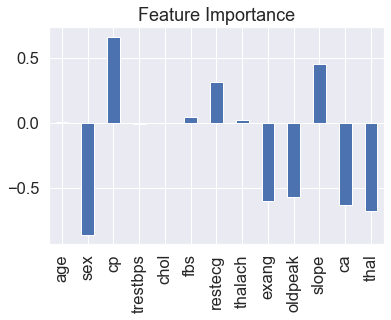

In [62]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);